# Concept

### 1. Supervised Learning
Models that can predit labels based on labeled training data

### 2. Unsupervised Learning
Models that identify structure in unlabeled data

### 3. Regression
Models that predict continuous labels

### 4. Classification
Models that predict labels as two or more discrete categories

### 5.Clustering
Models that detect and identify distinct groups in the data

### 6.Dimensionality reduction
Models that detect and identify lower-dimensional structure in higher-dimensional data

# Data Representation in Scikit-Learn

### 1. Data as table

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()



/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Features Matrix
 The features matrix is assumed to be two-dimensional, with shape **[n_samples, n_features]**, and is most often contained in a NumPy array or a Pandas DataFrame, though some Scikit-Learn models also accept SciPy sparse matrices.

### 3. Target Array
The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable. For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the **species** column would be considered the target array

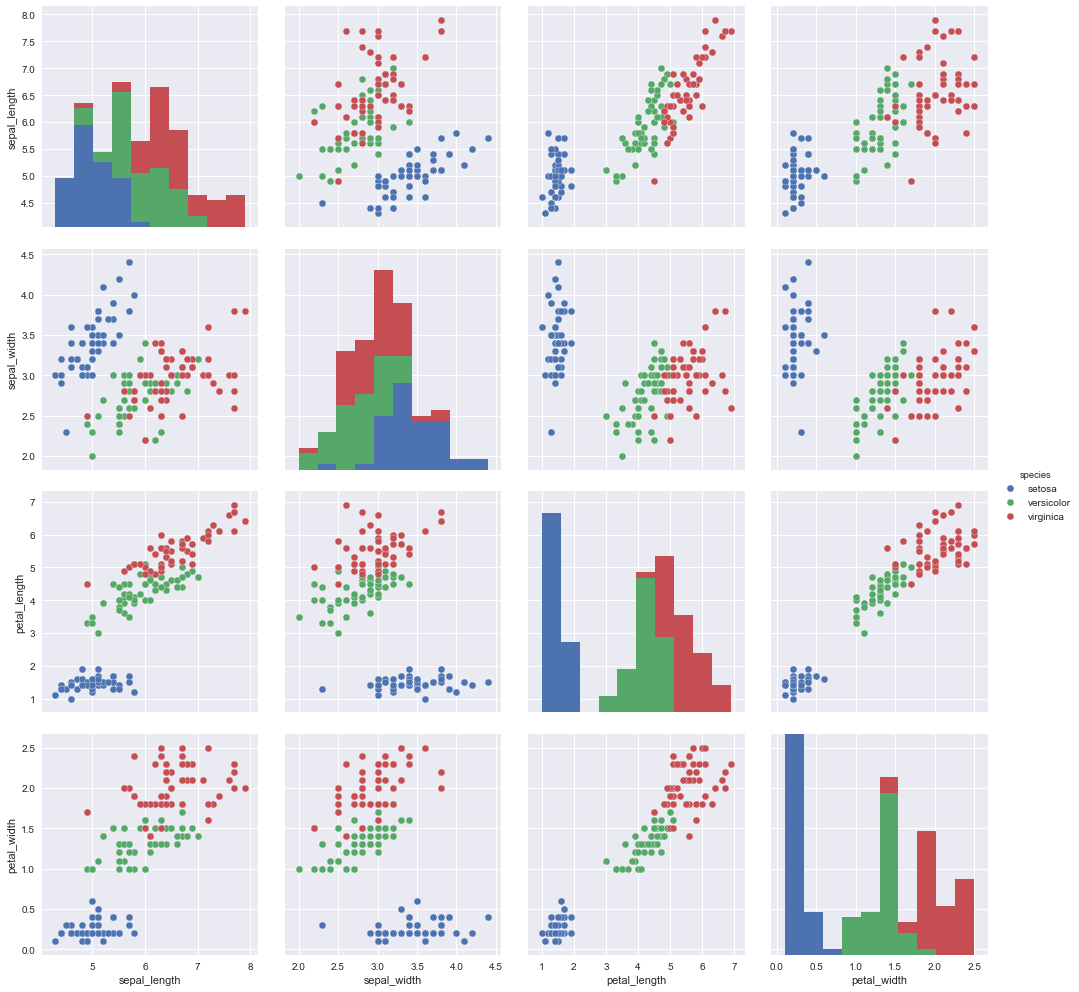

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=3.5);

# hue : string (variable name), optional
# Variable in data to map plot aspects to different colors.

In [6]:
# extract the features matrix and target array from the DataFrame,
# which we can do using some of the Pandas DataFrame operations discussed in Chaptet3:

iris.shape

(150, 5)

In [7]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

### 4. Scikit-Learn's Estimator API

(1). **Consistency**: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
    

(2). **Inspection**: All specified parameter values are exposed as public attributes.
    

(3). **Limited object hierarchy**: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

    
(4). **Composition**: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.


(5). **Sensible defaults**: When models require user-specified parameters, the library defines an appropriate default value.

### 5. Basics of the API

(1). Choose a class of model by importing the appropriate estimator class from Scikit-Learn.


(2). Choose model hyperparameters by instantiating this class with desired values.


(3). Arrange data into a features matrix and target vector following the discussion above.


(4). Fit the model to your data by calling the fit() method of the model instance.


(5). Apply the Model to new data:


For supervised learning, often we predict labels for unknown data using the **predict()** method.


For unsupervised learning, we often transform or infer properties of the data using the **transform()** or **predict()** method.

### 6. Supervised learning example: Simple linear regression

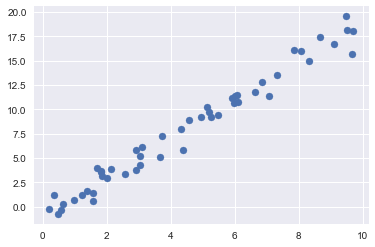

In [9]:
# Build the data

import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

##### 1. Choose a class of model


In [10]:
from sklearn.linear_model import LinearRegression


/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


##### 2. Choose model hyperparameters（超参数）



In [11]:
# intercept -> 截距
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### 3. Arrange data into a features matrix and target vector


In [12]:
# 1D array
# In [7]: arr = np.arange(4)
# In [8]: arr.shape
# Out[8]: (4,)

# make it as row vector by inserting an axis along first dimension
# In [9]: row_vec = arr[np.newaxis, :]
# In [10]: row_vec.shape
# Out[10]: (1, 4)

# make it as column vector by inserting an axis along second dimension
# In [11]: col_vec = arr[:, np.newaxis]
# In [12]: col_vec.shape
# Out[12]: (4, 1)

X = x[:, np.newaxis]
X.shape

(50, 1)

##### 4. Fit the model to your data

In [13]:
# This fit() command causes a number of model-dependent internal computations to take place, 
# and the results of these computations are stored in model-specific attributes that the user can explore. 
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
model.coef_


array([ 1.9776566])

In [15]:
model.intercept_


-0.90331072553111635

In [16]:
# These two parameters represent the slope and intercept of the simple linear fit to the data. 
# Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

##### 5. Predict labels for unknown data

In [18]:
#  In Scikit-Learn, this can be done using the predict() method.
xfit = np.linspace(-1, 11)


In [19]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

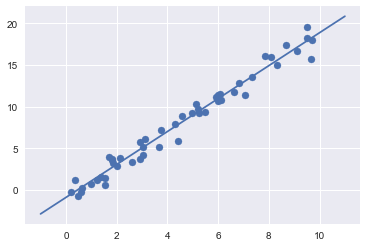

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning example: Iris classification

In [24]:
# We would like to evaluate the model on data it has not seen before, 
# and so we will split the data into a training set and a testing set. This could be done by hand, 
# but it is more convenient to use the train_test_split utility function:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [25]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [27]:
# With an accuracy topping 97%, 
# we see that even this very naive classification algorithm is effective for this particular dataset!
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

## Unsupervised learning example: Iris dimensionality

In [28]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


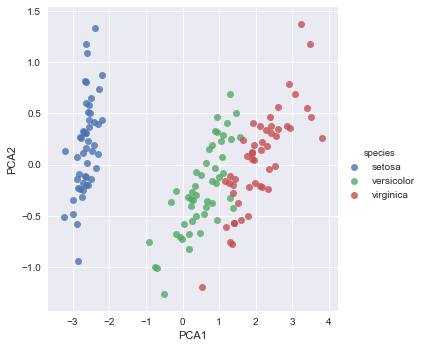

In [29]:
# Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, 
# and use Seaborn's lmplot to show the results:

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## Unsupervised learning: Iris clustering


In [32]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                              # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                 # 4. Determine cluster labels

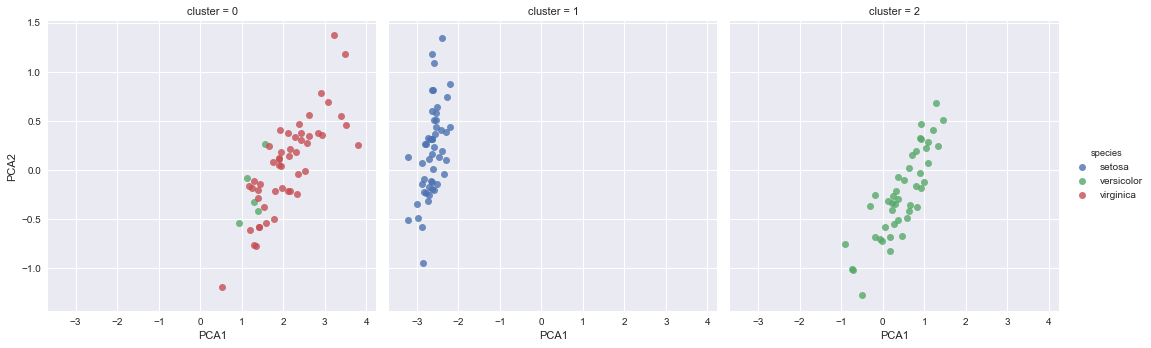

In [34]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

# By splitting the data by cluster number, 
# we see exactly how well the GaussianMixture algorithm has recovered the underlying label: 
# the setosa species is separated perfectly within cluster 0, 
# while there remains a small amount of mixing between versicolor and virginica. 
# This means that even without an expert to tell us the species labels of the individual flowers, 
# the measurements of these flowers are distinct enough 
# that we could automatically identify the presence of these different groups of 
# species with a simple clustering algorithm! This sort of algorithm might further give experts 
# in the field clues as to the relationship between the samples they are observing.

## Application: Exploring Hand-written Digits

##### 1. Loading and visualizing the digits data

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

/Users/chauncey_chen/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(1797, 8, 8)

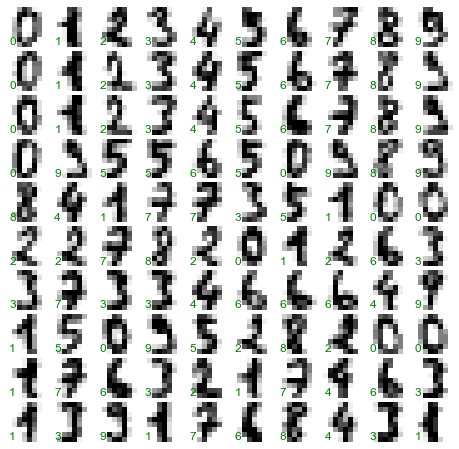

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

##### 2. Unsupervised learning: Dimensionality reduction

In [40]:
# We'd like to visualize our points within the 64-dimensional parameter space, 
# but it's difficult to effectively visualize points in such a high-dimensional space. 
# Instead we'll reduce the dimensions to 2, using an unsupervised method. 
# Here, we'll make use of a manifold learning algorithm called Isomap

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

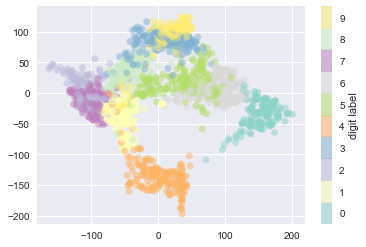

In [45]:
# This plot gives us some good intuition into how well various numbers 
# are separated in the larger 64-dimensional space. 
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set3', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

##### 3. Classification on digits


In [46]:
# split the data into a training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)


In [48]:
# fit a Gaussian naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [50]:
# Now that we have predicted our model, 
# we can gauge its accuracy by comparing the true values of the test set to the predictions:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

###### With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

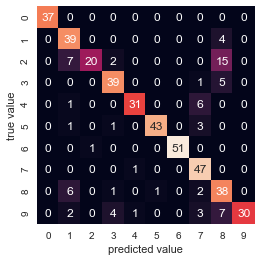

In [52]:
# confusion matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

##### This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

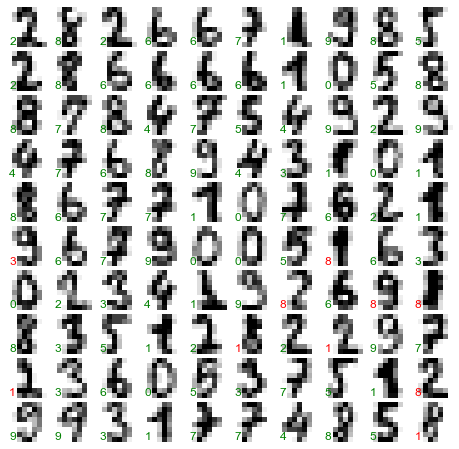

In [55]:
# Using green for correct labels, and red for incorrect labels:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')